In [1]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
from autograd import grad

Исходные данные

In [2]:
x = np.arange(1, 101)
y = 5 * x + 7 + np.random.uniform(-20, 20, size=100)

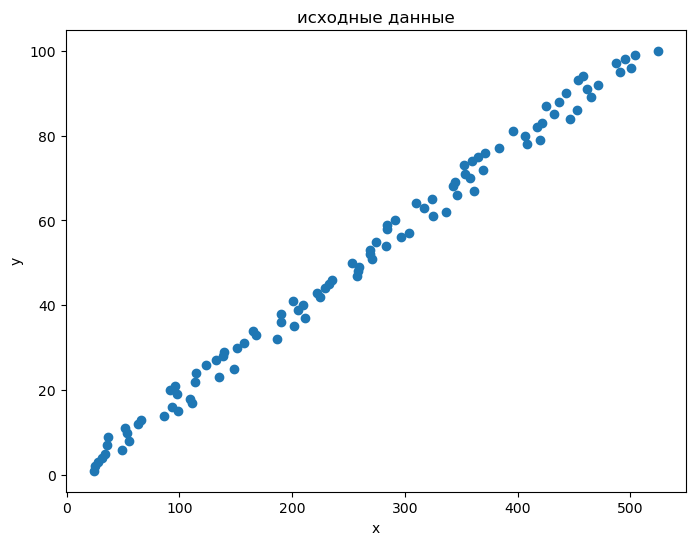

In [3]:
plt.figure(figsize=(8, 6))
plt.scatter(y, x)
plt.title('исходные данные')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Функция потерь

In [4]:
def loss_function(x, y, w, b):
    pred = w*x+b
    squared_errors = (pred - y)**2
    return np.sum(squared_errors) / (2*len(x))

F = loss_function(x, y, 0, 0) #w=0, b=0
F

44029.12665479127

Частные производные

In [5]:
def grad(x, y, w, b):
    n = len(x)
    grad_w = np.sum((w*x + b - y) * x) / n
    grad_b = np.sum(w*x + b - y) / n
    return grad_w, grad_b

dw, db = grad(x, y, 0, 0) #w=0, b=0
dw, db

(-17246.64952591511, -259.5968041012859)

Градиентный спуск

In [6]:
def grad_descent(x, y, lamb=0.0001):
    w, b = 0, 0
    i = 0
    while i <= 100000:
        dw, db = grad(x, y, w, b)
        w_new = w - lamb * dw
        b_new = b - lamb * db
        
        if np.sqrt((b_new - b)**2 + (w_new - w)**2) <= 0.001:
            break
        i += 1
        w, b = w_new, b_new
    return w, b, i

In [7]:
w, b, iterations = grad_descent(x, y)
w, b

(5.094106417012351, 0.08015030465802407)

In [8]:
#сравнение с линейной регрессией
model = LinearRegression()
model.fit(x.reshape(-1, 1), y)
sk_w = model.coef_[0]
sk_b = model.intercept_
sk_w, sk_b

(4.9649095935195575, 8.868869628548254)

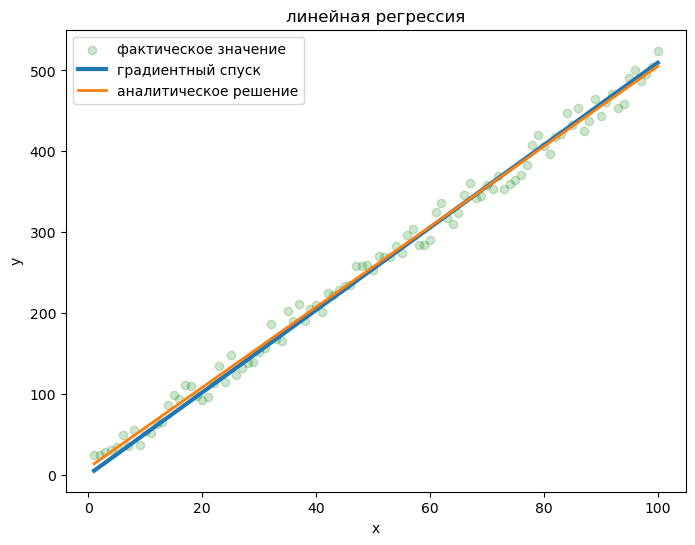

In [9]:
#визуализация
plt.figure(figsize=(8, 6))
plt.scatter(x, y, label='фактическое значение', color='green', alpha=0.2)
plt.plot(x, w*x + b, label='градиентный спуск', linewidth=3)
plt.plot(x, sk_w*x + sk_b, label='аналитическое решение', linewidth=2)
plt.title('линейная регрессия')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()